# SVM (Frequencies + Control Variables)

In [2]:
#Loading Required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn
import shap
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import numpy as np

from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest

## Using Original data to create SVM

For uniformity among the results we are using train and test set which are split previously.

In [24]:
#loading the required data
X_train=pd.read_csv('Data/Normal/X_train.csv')
X_test=pd.read_csv('Data/Normal/X_test.csv')
y_test=pd.read_csv('Data/Normal/y_test.csv')
y_train=pd.read_csv('Data/Normal/y_train.csv')

Selecting only the features we got through feature selection.

In [25]:

X_train=X_train[['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test=X_test[['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]

### Scaling

In [26]:
#Using standard scaler to scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Grid Search

In [18]:
#Using gridsearchcv to find best hyperparameters for svm
svm_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

parameters = [svm_linear, svm_others]

  
grid = GridSearchCV(SVC(), param_grid=parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
print(grid.fit(X_train, y_train).best_params_)
# print best parameter after tuning 


Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.923 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.974 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.974 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.974 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear

In [19]:
#Printing the best parameters got from feature selection
print(grid.best_params_) 

{'C': 10, 'kernel': 'linear'}


In [27]:
#Create a svm Classifier
clf_org = svm.SVC(C=10,kernel='linear',probability=True)
#Train the model using the training sets
clf_org.fit(X_train, y_train)
y_pred_tr=clf_org.predict(X_train)
# Finding accuracy, F1 score, Recall Score, Precision Score of the training set

print ("Accuracy score of training set:",accuracy_score(y_train, y_pred_tr))
print ("F1 Score of training set:",f1_score(y_train, y_pred_tr))
print ("Recall score of training set:",recall_score(y_train, y_pred_tr))
print ("Precision score of training set:",precision_score(y_train, y_pred_tr))

Accuracy score of training set: 1.0
F1 Score of training set: 1.0
Recall score of training set: 1.0
Precision score of training set: 1.0


In [28]:

#Predict the response for test dataset
y_pred = clf_org.predict(X_test)
# Finding accuracy, F1 score, Recall Score, Precision Score of the test set

print ("Accuracy score of test set:",round(accuracy_score(y_test, y_pred),4))
print ("F1 Score of test set:",round(f1_score(y_test, y_pred),4))
print ("Recall score of test set:",round(recall_score(y_test, y_pred),4))
print ("Precision score of test set:",round(precision_score(y_test, y_pred),4))

Accuracy score of test set: 0.9375
F1 Score of test set: 0.8
Recall score of test set: 0.75
Precision score of test set: 0.8571


In [29]:
X_test = pd.DataFrame(X_test, columns=['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)'])
X_train = pd.DataFrame(X_train, columns=['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)'])

In [30]:


shap.initjs() 

    # use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(clf_org.predict_proba, X_train, nsamples=100, link="logit")
shap_values = explainer.shap_values(X_test)

    # plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0, :], X_test.iloc[0, :], link="logit")

Using 191 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 48/48 [01:46<00:00,  2.22s/it]


In the force plot  the positive SHAP values are shown on the left side of this figure, while the negative values are shown on the right, as though they were in contest. The prediction for the first row of observation is represented by the value in bold.

## Dependance plot

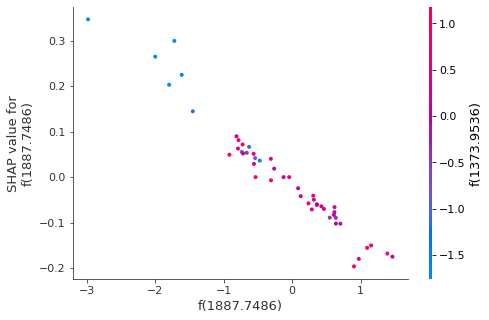

In [ ]:
shap.dependence_plot("f(1887.7486)", shap_values[0], X_test)

A dependance plot of the variable f(1887.7486) is provided here by the shap module . Another variable, in this example f(2747.9073),which frequently interacts with f(1887.7486), is automatically identified. Negative  trend between these variables can be seen.Likewise we can create dependance plots of the variables.

## Feature Importance

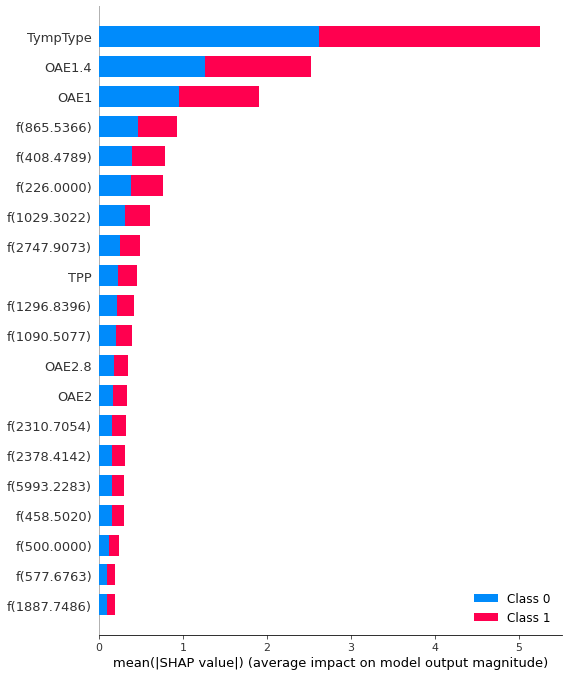

In [31]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

Here we can see that the variable tymp type is contributing more to the prediction which is overfitting the model

## Summary plot

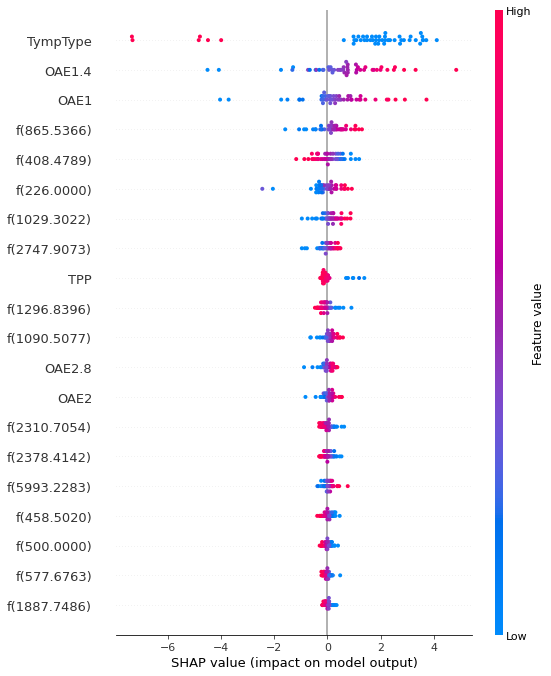

In [33]:
shap.initjs()
shap.summary_plot(shap_values[0], X_test)

As we can see here the high values of the variable tymp type affects negatively and the low values affects positively to the model.Similarly we  can see for each of the features of the model using shap values 

## Using Data with Oversampling to create  SVM

In [34]:

X_train_over=pd.read_csv('Data/Oversampling/X_train_over.csv')
X_test_over=pd.read_csv('Data/Oversampling/X_test_over.csv')
y_test_over=pd.read_csv('Data/Oversampling/y_test_over.csv')
y_train_over=pd.read_csv('Data/Oversampling/y_train_over.csv')

In [35]:
X_train_over=X_train_over[['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test_over=X_test_over[['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]


### Scaling

In [36]:
scaler = StandardScaler()
X_train_over = scaler.fit_transform(X_train_over)
X_test_over = scaler.transform(X_test_over)

# Grid Search

In [89]:
svm_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

parameters = [svm_linear, svm_others]

  
grid = GridSearchCV(SVC(), param_grid=parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_over, y_train_over)
# print best parameter after tuning 

Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.971 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.926 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.941 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.971 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             verbose=3)

In [90]:
print(grid.best_params_) 

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [37]:

clf = svm.SVC(C=1,gamma=1,kernel='rbf',probability=True)
#Train the model using the training sets
clf.fit(X_train_over, y_train_over)
# Finding accuracy, F1 score, Recall Score, Precision Score of the training set

y_pred_tr=clf.predict(X_train_over)
print ("Accuracy score of training set:",round(accuracy_score(y_train_over, y_pred_tr),4))
print ("F1 Score of training set:",round(f1_score(y_train_over, y_pred_tr),4))
print ("Recall score of training set:",round(recall_score(y_train_over, y_pred_tr),4))
print ("Precision score of training set:",round(precision_score(y_train_over, y_pred_tr),4))

Accuracy score of training set: 1.0
F1 Score of training set: 1.0
Recall score of training set: 1.0
Precision score of training set: 1.0


In [38]:

#Predict the response for test dataset
y_pred_over = clf.predict(X_test_over)

# Finding accuracy, F1 score, Recall Score, Precision Score of the test set

print ("Accuracy score of test set:",round(accuracy_score(y_test_over, y_pred_over),4))
print ("F1 Score of test set:",round(f1_score(y_test_over, y_pred_over),4))
print ("Recall score of test set:",round(recall_score(y_test_over, y_pred_over),4))
print ("Precision score of test set:",round(precision_score(y_test_over, y_pred_over),4))



Accuracy score of test set: 0.9672
F1 Score of test set: 0.9655
Recall score of test set: 0.9333
Precision score of test set: 1.0


## Using Over sampling large data to create SVM

In [3]:

X_train_overlg=pd.read_csv('Data/Oversampling Large/X_train_over.csv')
X_test_overlg=pd.read_csv('Data/Oversampling Large/X_test_over.csv')
y_test_overlg=pd.read_csv('Data/Oversampling Large/y_test_over.csv')
y_train_overlg=pd.read_csv('Data/Oversampling Large/y_train_over.csv')

In [4]:
X_train_overlg=X_train_overlg[['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test_overlg=X_test_overlg[['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]

### Scaling

In [5]:
scaler = StandardScaler()
X_train_overlg = scaler.fit_transform(X_train_overlg)
X_test_overlg = scaler.transform(X_test_overlg)

In [6]:
y_test_overlg=y_test_overlg.iloc[:,1:]
y_train_overlg=y_train_overlg.iloc[:,1:]


# Grid Search

In [7]:
svm_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

parameters = [svm_linear, svm_others]

  
grid = GridSearchCV(SVC(), param_grid=parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_overlg, y_train_overlg)
# print best parameter after tuning 

Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.1s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.1s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.1s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.1s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.1s
[CV 1/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             verbose=3)

In [9]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 0.1, 'kernel': 'linear'}


In [10]:

clf = svm.SVC(C=0.1,kernel='linear',probability=True)
#Train the model using the training sets
clf.fit(X_train_overlg, y_train_overlg)

y_pred_tr=clf.predict(X_train_overlg)
# Finding accuracy, F1 score, Recall Score, Precision Score of the test set

print ("Accuracy score of training set:",round(accuracy_score(y_train_overlg, y_pred_tr),4))
print ("F1 Score of training set:",round(f1_score(y_train_overlg, y_pred_tr),4))
print ("Recall score of training set:",round(recall_score(y_train_overlg, y_pred_tr),4))
print ("Precision score of training set:",round(precision_score(y_train_overlg, y_pred_tr),4))




Accuracy score of training set: 1.0
F1 Score of training set: 1.0
Recall score of training set: 1.0
Precision score of training set: 1.0


In [11]:
#Predict the response for test dataset
y_pred_overlg = clf.predict(X_test_overlg)
# Finding accuracy, F1 score, Recall Score, Precision Score of the test set

print ("Accuracy score of test set:",round(accuracy_score(y_test_overlg, y_pred_overlg),4))
print ("F1 Score of test set:",round(f1_score(y_test_overlg, y_pred_overlg),4))
print ("Recall score of test set:",round(recall_score(y_test_overlg, y_pred_overlg),4))
print ("Precision score of test set:",round(precision_score(y_test_overlg, y_pred_overlg),4))

Accuracy score of test set: 1.0
F1 Score of test set: 1.0
Recall score of test set: 1.0
Precision score of test set: 1.0


## Using Adasyn Large data to create  SVM

In [93]:

X_train_adasyn=pd.read_csv('Data/Adasyn Large/X_train_adasyn.csv')
X_test_adasyn=pd.read_csv('Data/Adasyn Large/X_test_adasyn.csv')
y_test_adasyn=pd.read_csv('Data/Adasyn Large/y_test_adasyn.csv')
y_train_adasyn=pd.read_csv('Data/Adasyn Large/y_train_adasyn.csv')

In [94]:
X_train_adasyn=X_train_adasyn[['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test_adasyn=X_test_adasyn[['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]


In [95]:
scaler = StandardScaler()
X_train_adasyn = scaler.fit_transform(X_train_adasyn)
X_test_adasyn = scaler.transform(X_test_adasyn)

In [96]:
svm_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

parameters = [svm_linear, svm_others]

  
grid = GridSearchCV(SVC(), param_grid=parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_adasyn, y_train_adasyn)


Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.995 total time=   0.3s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.997 total time=   0.1s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.996 total time=   0.1s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.994 total time=   0.1s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.996 total time=   0.1s
[CV 1/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.1s
[CV 2/5] END ................C=1, kernel=linear;, score=0.999 total time=   0.1s
[CV 3/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.1s
[CV 4/5] END ................C=1, kernel=linear;, score=0.999 total time=   0.1s
[CV 5/5] END ................C=1, kernel=linear;, score=0.998 total time=   0.1s
[CV 1/5] END ...............C=10, kernel=linear;, score=1.000 total time=   0.1s
[CV 2/5] END ...............C=10, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             verbose=3)

In [97]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [98]:
clf = svm.SVC(C=1,gamma=0.1,kernel='rbf')
#Train the model using the training sets
clf.fit(X_train_adasyn, y_train_adasyn)

y_pred_tr=clf.predict(X_train_adasyn)
# Finding accuracy, F1 score, Recall Score, Precision Score of the training set

print ("Accuracy score of training set:",round(accuracy_score(y_train_adasyn, y_pred_tr),4))
print ("F1 Score of training set:",round(f1_score(y_train_adasyn, y_pred_tr),4))
print ("Recall score of training set:",round(recall_score(y_train_adasyn, y_pred_tr),4))
print ("Precision score of training set:",round(precision_score(y_train_adasyn, y_pred_tr),4))



Accuracy score of training set: 1.0
F1 Score of training set: 1.0
Recall score of training set: 1.0
Precision score of training set: 1.0


In [99]:

#Predict the response for test dataset
y_pred_adasyn= clf.predict(X_test_adasyn)
# Finding accuracy, F1 score, Recall Score, Precision Score of the test set

print ("Accuracy score of test set:",round(accuracy_score(y_test_adasyn, y_pred_adasyn),4))
print ("F1 Score of test set:",round(f1_score(y_test_adasyn, y_pred_adasyn),4))
print ("Recall score of test set:",round(recall_score(y_test_adasyn, y_pred_adasyn),4))
print ("Precision score of test set:",round(precision_score(y_test_adasyn, y_pred_adasyn),4))

Accuracy score of test set: 1.0
F1 Score of test set: 1.0
Recall score of test set: 1.0
Precision score of test set: 1.0


## Using Smote data to create  SVM

In [85]:

X_train_smote=pd.read_csv('Data/Smote/X_train_smote.csv')
X_test_smote=pd.read_csv('Data/Smote/X_test_smote.csv')
y_test_smote=pd.read_csv('Data/Smote/y_test_smote.csv')
y_train_smote=pd.read_csv('Data/Smote/y_train_smote.csv')

In [86]:
X_train_smote=X_train_smote[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test_smote=X_test_smote[['f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]


In [87]:
y_test_smote=y_test_smote.iloc[:,1:]
y_train_smote=y_train_smote.iloc[:,1:]


In [88]:
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test_smote = scaler.transform(X_test_smote)

In [89]:
svm_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

parameters = [svm_linear, svm_others]

  
grid = GridSearchCV(SVC(), param_grid=parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.928 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.897 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.868 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.868 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.824 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.882 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.882 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.824 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.928 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             verbose=3)

In [90]:
print(grid.best_params_) 

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [91]:
clf = svm.SVC(C=10,gamma=1,kernel='rbf')
#Train the model using the training sets
clf.fit(X_train_smote, y_train_smote)
# Finding accuracy, F1 score, Recall Score, Precision Score of the training set

y_pred_tr=clf.predict(X_train_smote)
print ("Accuracy score of training set:",round(accuracy_score(y_train_smote, y_pred_tr),4))
print ("F1 Score of training set:",round(f1_score(y_train_smote, y_pred_tr),4))
print ("Recall score of training set:",round(recall_score(y_train_smote, y_pred_tr),4))
print ("Precision score of training set:",round(precision_score(y_train_smote, y_pred_tr),4))





Accuracy score of training set: 1.0
F1 Score of training set: 1.0
Recall score of training set: 1.0
Precision score of training set: 1.0


In [92]:
#Predict the response for test dataset
y_pred_smote= clf.predict(X_test_smote)
# Finding accuracy, F1 score, Recall Score, Precision Score of the test set

print ("Accuracy score of test set:",round(accuracy_score(y_test_smote, y_pred_smote),4))
print ("F1 Score of test set:",round(f1_score(y_test_smote, y_pred_smote),4))
print ("Recall score of test set:",round(recall_score(y_test_smote, y_pred_smote),4))
print ("Precision score of test set:",round(precision_score(y_test_smote, y_pred_smote),4))

Accuracy score of test set: 0.9836
F1 Score of test set: 0.9831
Recall score of test set: 0.9667
Precision score of test set: 1.0


## Using Smote large data to create  SVM

In [36]:
X_train_smotelg=pd.read_csv('Data/Smote Large/X_train_smote.csv')
X_test_smotelg=pd.read_csv('Data/Smote Large/X_test_smote.csv')
y_test_smotelg=pd.read_csv('Data/Smote Large/y_test_smote.csv')
y_train_smotelg=pd.read_csv('Data/Smote Large/y_train_smote.csv')

In [32]:
X_train_smotelg=X_train_smotelg[['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test_smotelg=X_test_smotelg[['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]


In [37]:
y_test_smotelg=y_test_smotelg.iloc[:,1:]
y_train_smotelg=y_train_smotelg.iloc[:,1:]

In [34]:
scaler = MinMaxScaler()
X_train_smotelg = scaler.fit_transform(X_train_smotelg)
X_test_smotelg = scaler.transform(X_test_smotelg)

In [369]:
svm_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

parameters = [svm_linear, svm_others]

  
grid = GridSearchCV(SVC(), param_grid=parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_smotelg, y_train_smotelg)

Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.995 total time=   0.7s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.991 total time=   0.2s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.989 total time=   0.2s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.994 total time=   0.2s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.992 total time=   0.2s
[CV 1/5] END ................C=1, kernel=linear;, score=0.996 total time=   0.1s
[CV 2/5] END ................C=1, kernel=linear;, score=0.995 total time=   0.1s
[CV 3/5] END ................C=1, kernel=linear;, score=0.994 total time=   0.1s
[CV 4/5] END ................C=1, kernel=linear;, score=0.996 total time=   0.1s
[CV 5/5] END ................C=1, kernel=linear;, score=0.995 total time=   0.1s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.999 total time=   0.1s
[CV 2/5] END ...............C=10, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             verbose=3)

In [370]:
print(grid.best_params_) 

{'C': 100, 'kernel': 'linear'}


In [39]:
clf = svm.SVC(C=100,kernel='linear')
#Train the model using the training sets
clf.fit(X_train_smotelg, y_train_smotelg)
y_pred_tr=clf.predict(X_train_smotelg)
# Finding accuracy, F1 score, Recall Score, Precision Score of the training set


print ("Accuracy score of training set:",round(accuracy_score(y_train_smotelg, y_pred_tr),4))
print ("F1 Score of training set:",round(f1_score(y_train_smotelg, y_pred_tr),4))
print ("Recall score of training set:",round(recall_score(y_train_smotelg, y_pred_tr),4))
print ("Precision score of training set:",round(precision_score(y_train_smotelg, y_pred_tr),4))




Accuracy score of training set: 0.9972
F1 Score of training set: 0.9972
Recall score of training set: 0.9979
Precision score of training set: 0.9965


In [40]:
#Predict the response for test dataset
y_pred_smotelg= clf.predict(X_test_smotelg)
# Finding accuracy, F1 score, Recall Score, Precision Score of the test set

print ("Accuracy score of test set:",round(accuracy_score(y_test_smotelg, y_pred_smotelg),4))
print ("F1 Score of test set:",round(f1_score(y_test_smotelg, y_pred_smotelg),4))
print ("Recall score of test set:",round(recall_score(y_test_smotelg, y_pred_smotelg),4))
print ("Precision score of test set:",round(precision_score(y_test_smotelg, y_pred_smotelg),4))

Accuracy score of test set: 0.9973
F1 Score of test set: 0.9973
Recall score of test set: 0.9947
Precision score of test set: 1.0


## Using Svm Smote Large data to create  SVM

In [41]:
X_train_smotesvm=pd.read_csv('Data/Svm Smote Large/X_train_svmsmote.csv')
X_test_smotesvm=pd.read_csv('Data/Svm Smote Large/X_test_svmsmote.csv')
y_test_smotesvm=pd.read_csv('Data/Svm Smote Large/y_test_svmsmote.csv')
y_train_smotesvm=pd.read_csv('Data/Svm Smote Large/y_train_svmsmote.csv')

In [42]:
X_train_smotesvm=X_train_smotesvm[['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test_smotesvm=X_test_smotesvm[['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]


In [44]:
y_test_smotesvm=y_test_smotesvm.iloc[:,1:]
y_train_smotesvm=y_train_smotesvm.iloc[:,1:]


In [45]:
scaler = StandardScaler()
X_train_smotesvm = scaler.fit_transform(X_train_smotesvm)
X_test_smotesvm = scaler.transform(X_test_smotesvm)

In [378]:
svm_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

parameters = [svm_linear, svm_others]

  
grid = GridSearchCV(SVC(), param_grid=parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_smotesvm, y_train_smotesvm)

Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.956 total time=   0.8s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.955 total time=   0.4s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.946 total time=   0.4s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.956 total time=   0.4s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.968 total time=   0.4s
[CV 1/5] END ................C=1, kernel=linear;, score=0.987 total time=   0.2s
[CV 2/5] END ................C=1, kernel=linear;, score=0.996 total time=   0.2s
[CV 3/5] END ................C=1, kernel=linear;, score=0.987 total time=   0.2s
[CV 4/5] END ................C=1, kernel=linear;, score=0.988 total time=   0.2s
[CV 5/5] END ................C=1, kernel=linear;, score=0.992 total time=   0.2s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.992 total time=   0.1s
[CV 2/5] END ...............C=10, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             verbose=3)

In [379]:
print(grid.best_params_) 

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [46]:
clf = svm.SVC(C=10,gamma=1,kernel='rbf')
#Train the model using the training sets
clf.fit(X_train_smotesvm, y_train_smotesvm)

y_pred_tr=clf.predict(X_train_smotesvm)
# Finding accuracy, F1 score, Recall Score, Precision Score of the training set

print ("Accuracy score of training set:",round(accuracy_score(y_train_smotesvm, y_pred_tr),4))
print ("F1 Score of training set:",round(f1_score(y_train_smotesvm, y_pred_tr),4))
print ("Recall score of training set:",round(recall_score(y_train_smotesvm, y_pred_tr),4))
print ("Precision score of training set:",round(precision_score(y_train_smotesvm, y_pred_tr),4))



Accuracy score of training set: 1.0
F1 Score of training set: 1.0
Recall score of training set: 1.0
Precision score of training set: 1.0


In [47]:

#Predict the response for test dataset
y_pred_smotesvm= clf.predict(X_test_smotesvm)
# Finding accuracy, F1 score, Recall Score, Precision Score of the test set

print ("Accuracy score of test set:",round(accuracy_score(y_test_smotesvm, y_pred_smotesvm),4))
print ("F1 Score of test set:",round(f1_score(y_test_smotesvm, y_pred_smotesvm),4))
print ("Recall score of test set:",round(recall_score(y_test_smotesvm, y_pred_smotesvm),4))
print ("Precision score of test set:",round(precision_score(y_test_smotesvm, y_pred_smotesvm),4))

Accuracy score of test set: 0.9986
F1 Score of test set: 0.9987
Recall score of test set: 0.9973
Precision score of test set: 1.0


## Using data generated using VAE to create SVM

In [8]:
X_train_vae=pd.read_csv('Data/VAE/X_gen_train.csv')
X_test_vae=pd.read_csv('Data/VAE/X_gen_test.csv')
y_test_vae=pd.read_csv('Data/VAE/y_gen_test.csv')
y_train_vae=pd.read_csv('Data/VAE/y_gen_train.csv')

In [9]:
X_train_vae=X_train_vae[['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]
X_test_vae=X_test_vae[['TPP', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4','f(408.4789)', 'f(2593.6791)', 'f(2378.4142)', 'f(2310.7054)', 'f(7127.1897)', 'f(865.5366)', 'f(6727.1713)', 'f(226.0000)', 'f(458.5020)', 'f(500.0000)', 'f(1029.3022)', 'f(5993.2283)', 'f(1887.7486)', 'f(1373.9536)', 'f(667.4199)', 'f(2747.9073)', 'f(1296.8396)', 'f(577.6763)', 'f(1155.3527)', 'f(1090.5077)']]


In [10]:
y_test_vae=y_test_vae.iloc[:,1:]
y_train_vae=y_train_vae.iloc[:,1:]


In [11]:
scaler = StandardScaler()
X_train_vae = scaler.fit_transform(X_train_vae)
X_test_vae = scaler.transform(X_test_vae)

In [12]:
svm_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}

parameters = [svm_linear, svm_others]

  
grid = GridSearchCV(SVC(), param_grid=parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_vae,y_train_vae)

Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.974 total time=   0.7s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.979 total time=   0.7s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.980 total time=   0.7s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.979 total time=   0.8s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.974 total time=   0.6s
[CV 1/5] END ................C=1, kernel=linear;, score=0.974 total time=   0.8s
[CV 2/5] END ................C=1, kernel=linear;, score=0.978 total time=   0.8s
[CV 3/5] END ................C=1, kernel=linear;, score=0.981 total time=   0.8s
[CV 4/5] END ................C=1, kernel=linear;, score=0.981 total time=   0.8s
[CV 5/5] END ................C=1, kernel=linear;, score=0.974 total time=   0.7s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.974 total time=   1.6s
[CV 2/5] END ...............C=10, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             verbose=3)

In [13]:
print(grid.best_params_) 

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [14]:
clf = svm.SVC(C=100,gamma=0.01,kernel='rbf')
#Train the model using the training sets
clf.fit(X_train_vae, y_train_vae)
y_pred_tr=clf.predict(X_train_vae)
# Finding accuracy, F1 score, Recall Score, Precision Score of the training set

print ("Accuracy score of training set:",round(accuracy_score(y_train_vae, y_pred_tr),4))
print ("F1 Score of training set:",round(f1_score(y_train_vae, y_pred_tr),4))
print ("Recall score of training set:",round(recall_score(y_train_vae, y_pred_tr),4))
print ("Precision score of training set:",round(precision_score(y_train_vae, y_pred_tr),4))


Accuracy score of training set: 0.9845
F1 Score of training set: 0.9847
Recall score of training set: 0.9923
Precision score of training set: 0.9771


In [15]:
#Predict the response for test dataset
y_pred_vae= clf.predict(X_test_vae)
# Finding accuracy, F1 score, Recall Score, Precision Score of the test set

print ("Accuracy score of test set:",round(accuracy_score(y_test_vae, y_pred_vae),4))
print ("F1 Score of test set:",round(f1_score(y_test_vae, y_pred_vae),4))
print ("Recall score of test set:",round(recall_score(y_test_vae, y_pred_vae),4))
print ("Precision score of test set:",round(precision_score(y_test_vae, y_pred_vae),4))

Accuracy score of test set: 0.9782
F1 Score of test set: 0.9784
Recall score of test set: 0.99
Precision score of test set: 0.9671


Here the accuracy is 0.98

## Final Results from the models

From the Results it is clear that this set of features are overfitting  in every sampling methods.Analysing the results we can see that every model which was created using the Over Sampling,Adasyn,Smote,Smote large, VAE yields accuracy scores near to 100%. As it is clear from the results that feature Tymp Type is one of the main factor which drives the models to 100% accuracy rate.Further Feature Selection revealed the 20 frequencies are better for machine learning algorithms.